# Problem Statement

**Problem Scenario:**

The customer always looks forward to specialized treatment, whether shopping on
an e-commerce website or watching Netflix. The customer desires content that
aligns with their preferences. To maintain customer engagement, companies must
consistently provide the most relevant information.
Starting with Spotify, a Swedish audio streaming and media service provider, boasts
over 456 million active monthly users, including more than 195 million paid
subscribers as of September 2022. The company aims to create cohorts of different
songs to enhance song recommendations. These cohorts will be based on various
relevant features, ensuring that each group contains similar types of songs.

</br>

----

</br>

**Problem Objective:**

As a data scientist, you should perform exploratory data analysis and cluster
analysis to create cohorts of songs. The goal is to better understand the various
factors that create a cohort of songs.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load Data and Perform Data Quality Checks

In [ ]:
# Load dataset into a dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practice/Machine Learning/Project/Project2/rolling_stones_spotify.csv')

## Step 1.1 Initial data inspection and data cleaning

In [ ]:
# Display first five rows
df.head(5)

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [ ]:
df.tail(5)

Unnamed: 0                        name               album release_date  \
1605        1605                       Carol  The Rolling Stones   1964-04-16   
1606        1606                     Tell Me  The Rolling Stones   1964-04-16   
1607        1607         Can I Get A Witness  The Rolling Stones   1964-04-16   
1608        1608  You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609        1609             Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
1605             8  08l7M5UpRnffGl0FyuRiQZ   
1606             9  3JZllQBsTM6WwoJdzFDLhx   
1607            10  0t2qvfSBQ3Y08lzRRoVTdb   
1608            11  5ivIs5vwSj0RChOIvlY3On   
1609            12  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ        0.1570         0.466   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx        0.0576         0.509   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb        0.3710         0.790   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On        0.2170         0.700   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
1605   0.932          0.006170    0.3240    -9.214       0.0429  177.340   
1606   0.706          0.000002    0.5160    -9.427       0.0843  122.015   
1607   0.774          0.000000    0.0669    -7.961       0.0720   97.035   
1608   0.546          0.000070    0.1660    -9.567       0.0622  102.634   
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   

      valence  popularity  duration_ms  
1605    0.967          39       154080  
1606    0.446          36       245266  
1607    0.835          30       176080  
1608    0.532          27       121680  
1609    0.969          35       189186

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [ ]:
df.describe()

Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

In [ ]:
df.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

### Result: No missing value found

In [ ]:
# check for duplidate values
df.duplicated().sum()

0

### Result No duplicate records found

In [ ]:
# Display all column names
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [ ]:
df.shape

(1610, 18)

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

# df.drop(columns=['Unnamed: 0', 'Unnamed: 0'],inplace=True) # run it only once other wise there will be an error

In [ ]:
df.shape

(1610, 17)

In [ ]:
# convert data release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year from release_date
df['release_year'] = df['release_date'].dt.year

# Create a feature for the decade of release
df['release_decade'] = (df['release_year'] // 10) * 10

# Ensure consistent capitalization for album names
df['album'] = df['album'].str.title()

In [ ]:
df.head(5)

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In Nyc   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In Nyc   2022-06-10             2   
2           Start Me Up - Live  Licked Live In Nyc   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In Nyc   2022-06-10             4   
4            Don’t Stop - Live  Licked Live In Nyc   2022-06-10             5   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993          0.996000     0.932   -12.913       0.1100   
1         0.326   0.965          0.233000     0.961    -4.803       0.0759   
2         0.386   0.969          0.400000     0.956    -4.936       0.1150   
3         0.369   0.985          0.000107     0.895    -5.535       0.1930   
4         0.303   0.969          0.055900     0.966    -5.098       0.0930   

     tempo  valence  popularity  duration_ms  release_year  release_decade  
0  118.001   0.0302          33        48640          2022            2020  
1  131.455   0.3180          34       253173          2022            2020  
2  130.066   0.3130          34       263160          2022            2020  
3  132.994   0.1470          32       305880          2022            2020  
4  130.533   0.2060          32       305106          2022            2020

In [ ]:
numerical_columns  = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print(numerical_columns)
print(categorical_columns)

Index(['track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms'],
      dtype='object')
Index(['name', 'album', 'id', 'uri'], dtype='object')


# Step 2. Refine the data for further processing based on your findings

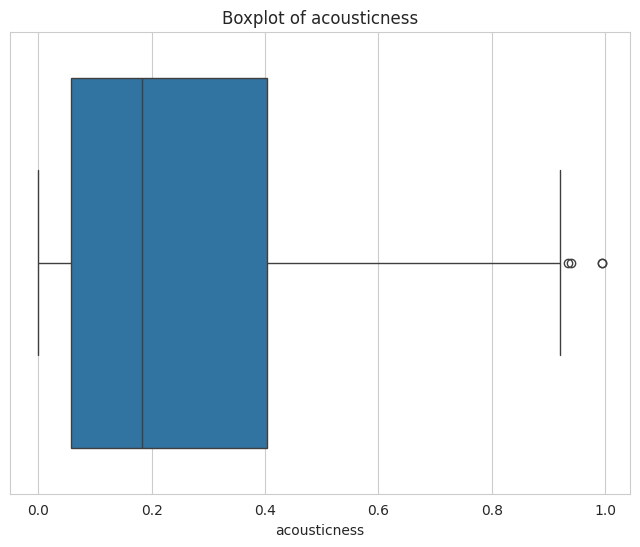

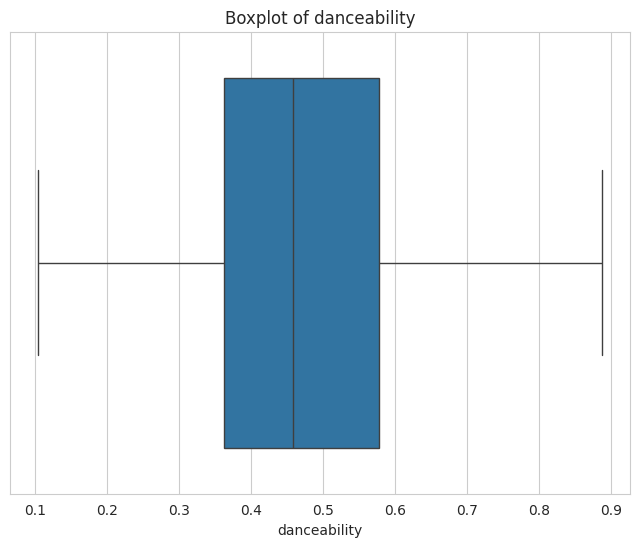

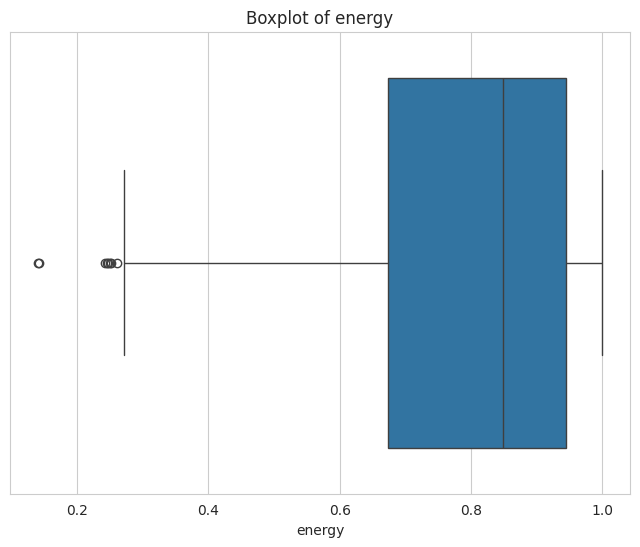

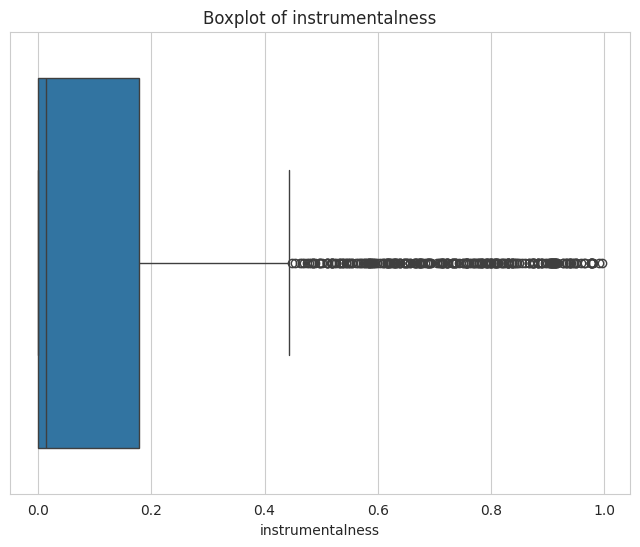

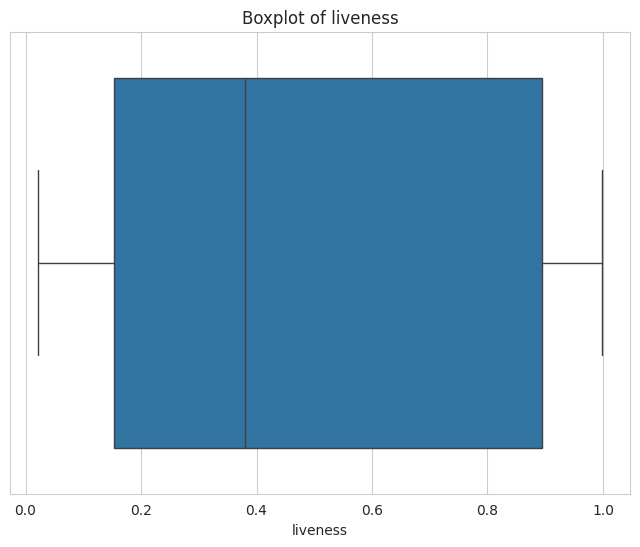

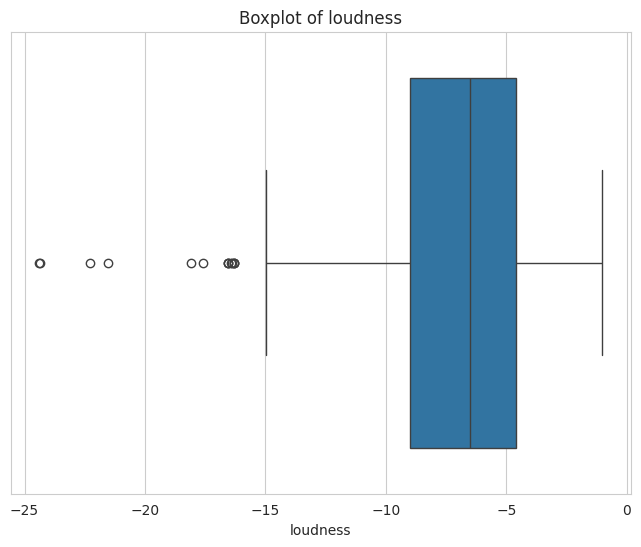

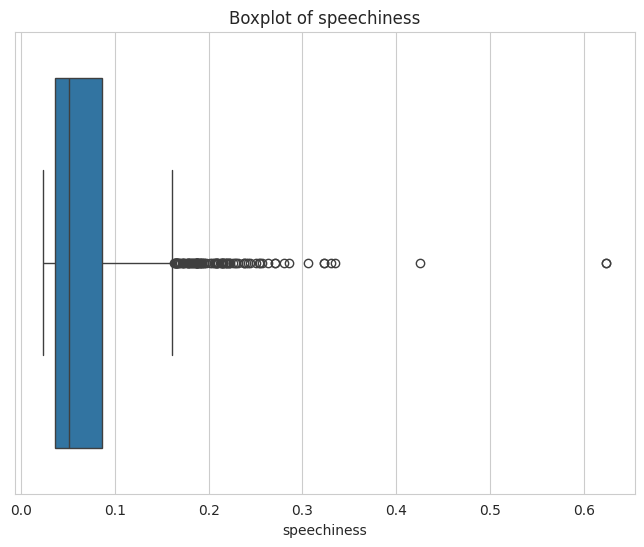

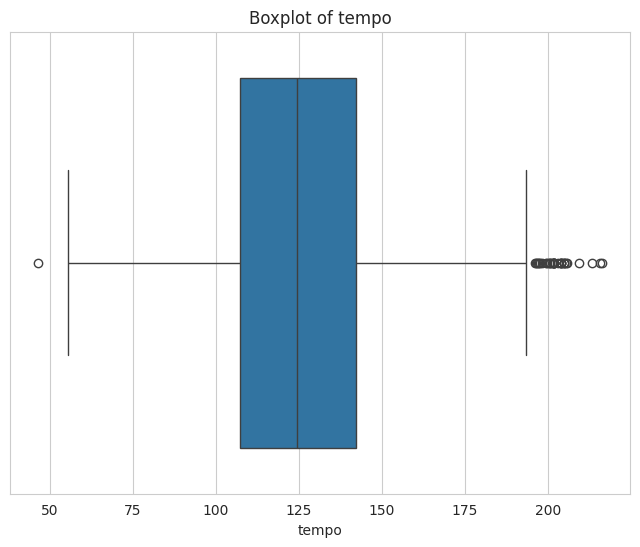

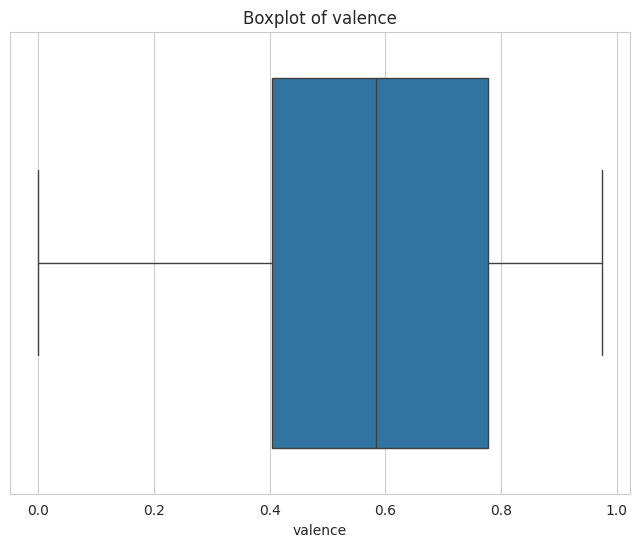

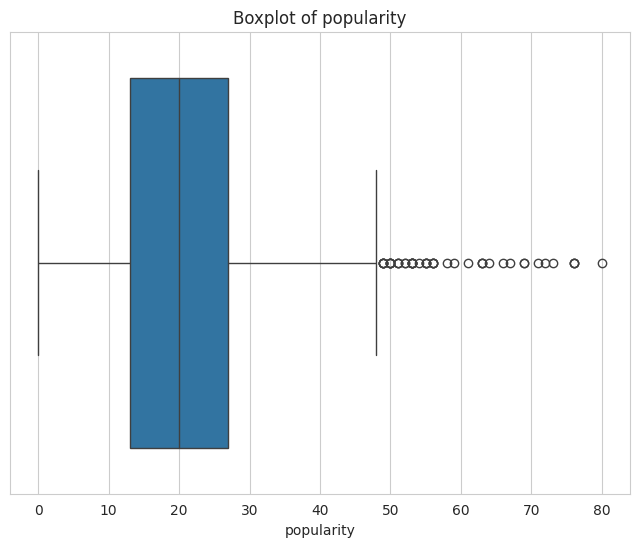

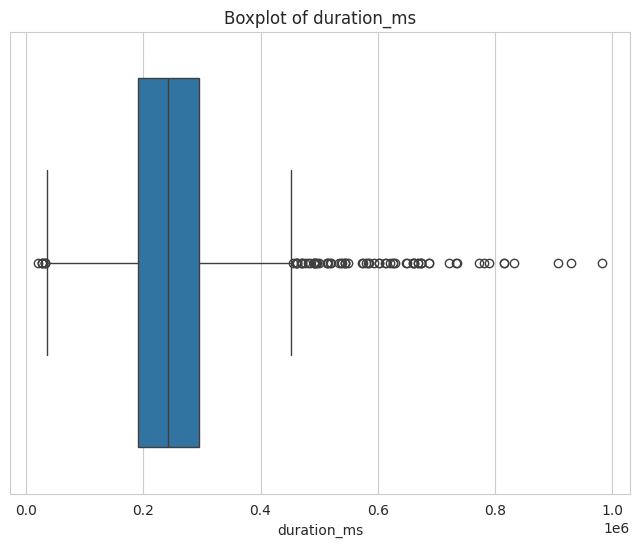

In [ ]:
# Check for outliers in numerical features using boxplots
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Normalize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
# Remove outliers based on Z-score
df = df[(np.abs(stats.zscore(df[numerical_features])) < 3).all(axis=1)]

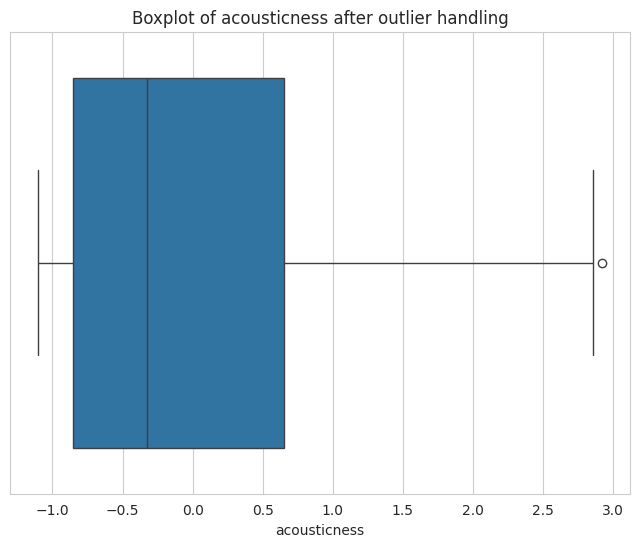

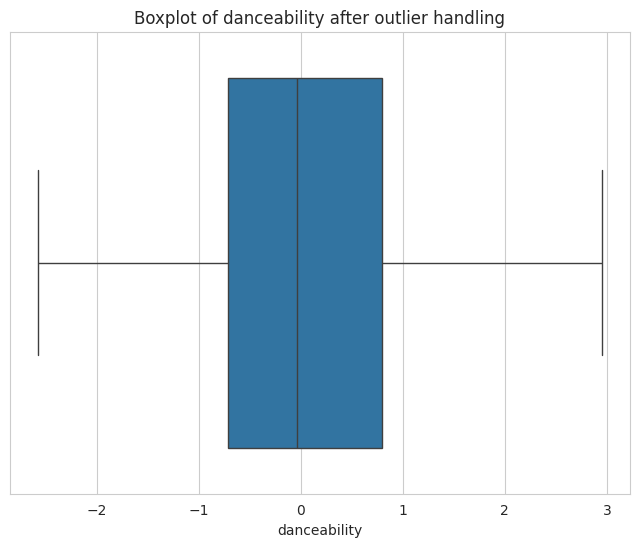

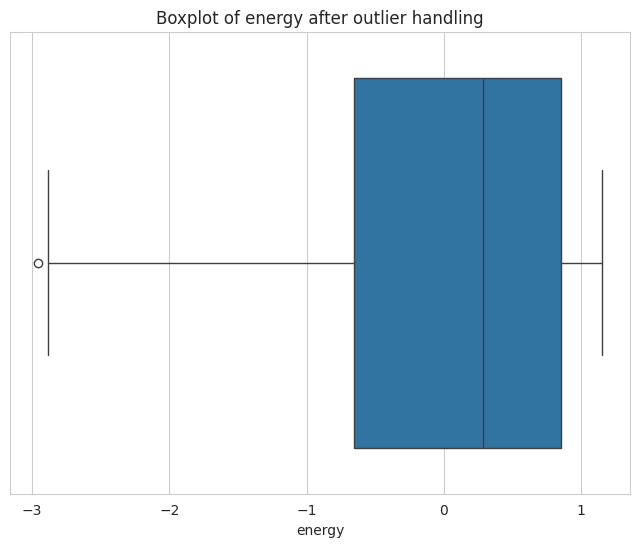

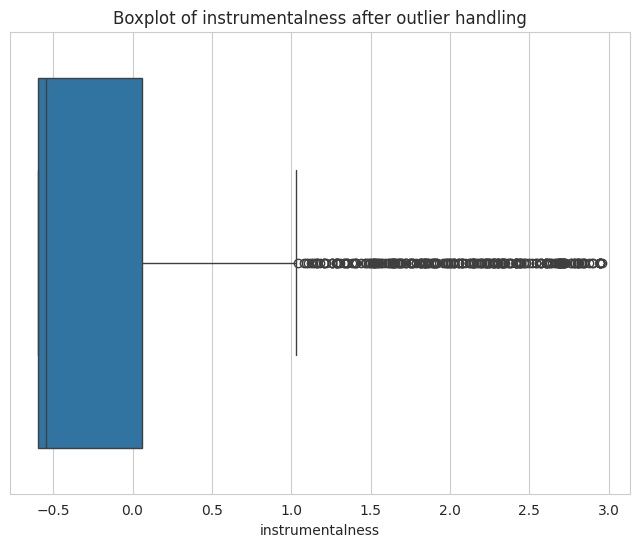

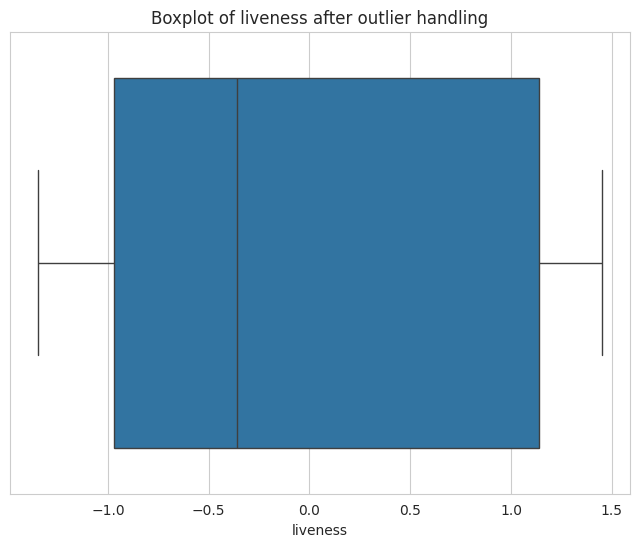

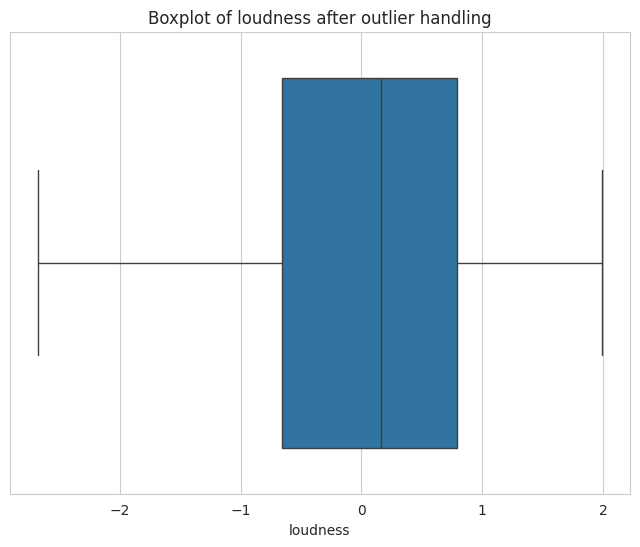

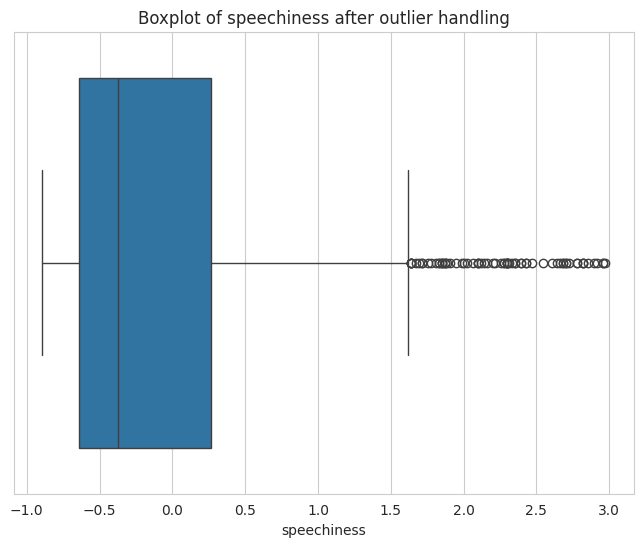

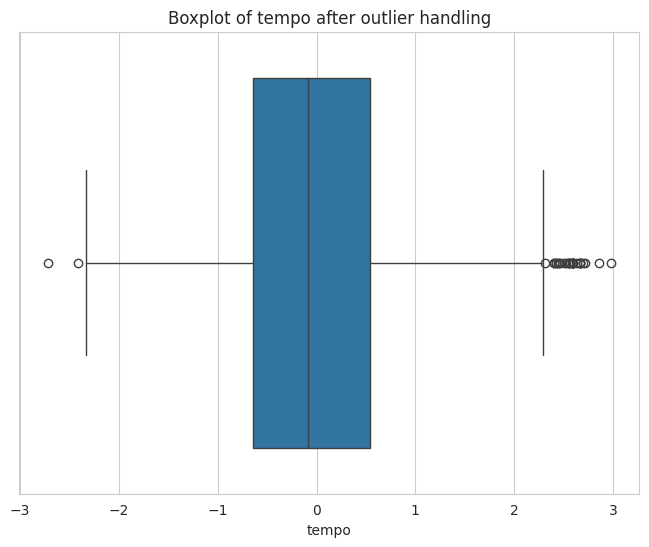

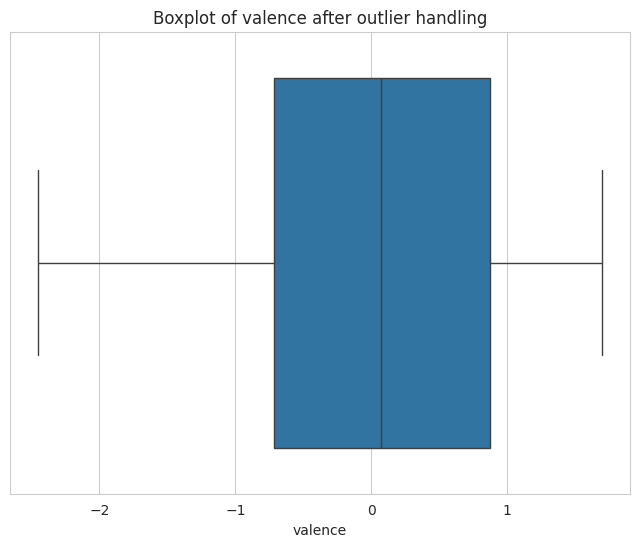

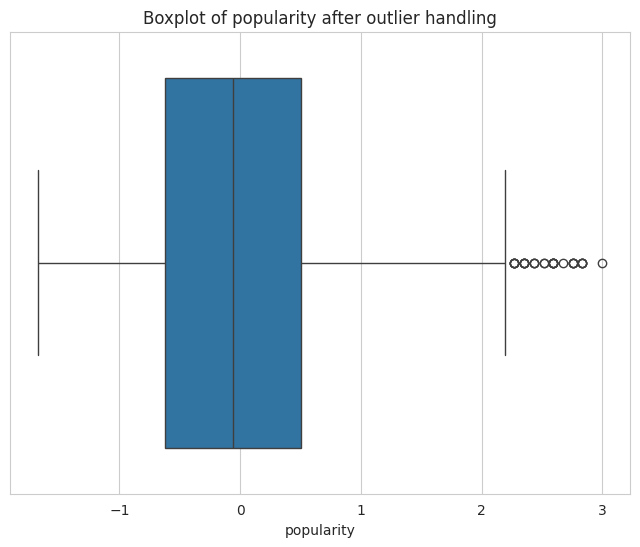

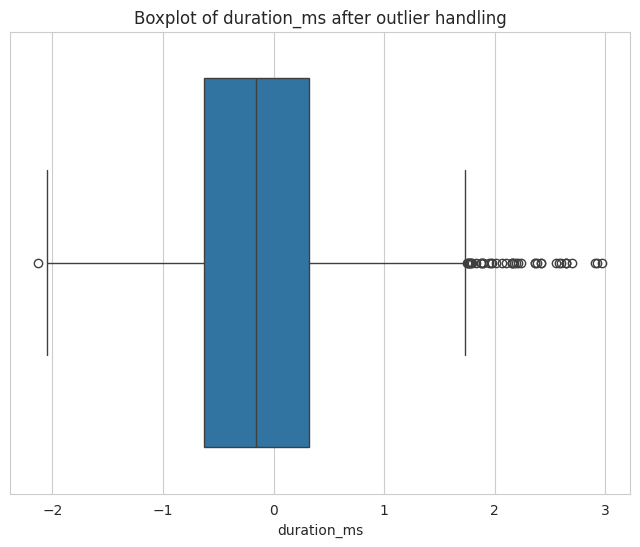

In [ ]:
# Recheck for outliers after handling
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after outlier handling')
    plt.show()

In [ ]:
#Further analysis for other potential outliers or erroneous entries.
#Example: Check for unrealistic values in 'release_year'.
print(df['release_year'].describe())
print(df['release_year'].unique())

count    1508.000000
mean     1991.477454
std        22.406722
min      1964.000000
25%      1970.000000
50%      1986.000000
75%      2017.000000
max      2022.000000
Name: release_year, dtype: float64
[2022 2021 2020 2019 2018 2017 2016 2012 2011 2005 2004 1997 1995 1994
 1991 1989 1986 1983 1982 1981 1980 1978 1977 1976 1974 1973 1972 1971
 1970 1969 1968 1967 1966 1965 1964]


### no outliers found in release_year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1508 entries, 1 to 1609
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1508 non-null   object        
 1   album             1508 non-null   object        
 2   release_date      1508 non-null   datetime64[ns]
 3   track_number      1508 non-null   int64         
 4   id                1508 non-null   object        
 5   uri               1508 non-null   object        
 6   acousticness      1508 non-null   float64       
 7   danceability      1508 non-null   float64       
 8   energy            1508 non-null   float64       
 9   instrumentalness  1508 non-null   float64       
 10  liveness          1508 non-null   float64       
 11  loudness          1508 non-null   float64       
 12  speechiness       1508 non-null   float64       
 13  tempo             1508 non-null   float64       
 14  valence           1508 non-nu

In [ ]:
df.describe()

release_date  track_number  acousticness  \
count                           1508   1508.000000   1508.000000   
mean   1992-01-16 12:50:36.604774528      8.696950     -0.022219   
min              1964-04-16 00:00:00      1.000000     -1.101790   
25%              1970-09-04 00:00:00      4.000000     -0.855927   
50%              1986-03-24 00:00:00      7.000000     -0.323213   
75%              2017-09-29 00:00:00     11.000000      0.653357   
max              2022-06-10 00:00:00     47.000000      2.918824   
std                              NaN      6.633975      0.983045   

       danceability       energy  instrumentalness     liveness     loudness  \
count   1508.000000  1508.000000       1508.000000  1508.000000  1508.000000   
mean       0.025699     0.015181          0.000492    -0.015994     0.038826   
min       -2.574310    -2.954748         -0.594467    -1.346251    -2.677645   
25%       -0.711627    -0.652573         -0.593674    -0.968447    -0.660153   
50%       -0.041343     0.287204         -0.544497    -0.357401     0.159740   
75%        0.798275     0.854406          0.058227     1.138339     0.792702   
max        2.950239     1.149129          2.957784     1.450668     1.990468   
std        0.998572     0.968489          1.002117     0.994965     0.927234   

       speechiness        tempo      valence   popularity  duration_ms  \
count  1508.000000  1508.000000  1508.000000  1508.000000  1508.000000   
mean     -0.082067    -0.014592     0.044189    -0.025387    -0.084570   
min      -0.897261    -2.722281    -2.449447    -1.673364    -2.127829   
25%      -0.641523    -0.639937    -0.715524    -0.626918    -0.628503   
50%      -0.372223    -0.087052     0.068494    -0.063447    -0.159959   
75%       0.263247     0.536297     0.869814     0.500024     0.320679   
max       2.973682     2.982849     1.694926     2.995396     2.968763   
std       0.778145     0.992560     0.990758     0.924841     0.776128   

       release_year  release_decade  
count   1508.000000     1508.000000  
mean    1991.477454     1986.836870  
min     1964.000000     1960.000000  
25%     1970.000000     1970.000000  
50%     1986.000000     1980.000000  
75%     2017.000000     2010.000000  
max     2022.000000     2020.000000  
std       22.406722       22.530844

Unnammed:0, name, album, release date, track_number, Id, URL

# Step 3: Exploratory Data Analysis (EDA)

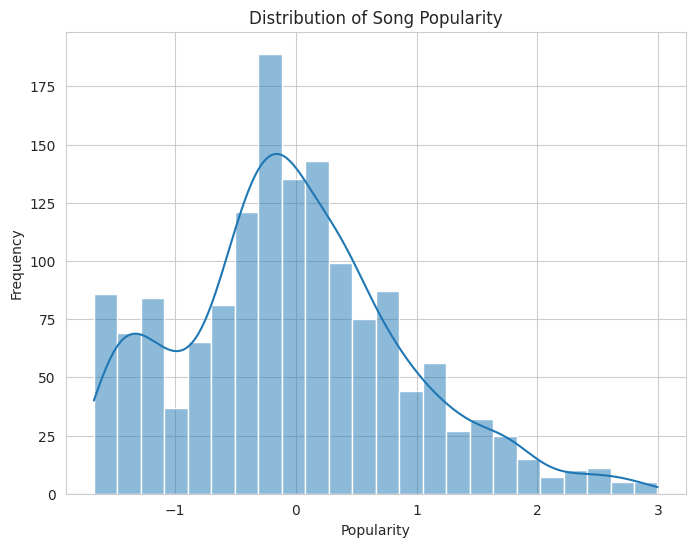

In [ ]:
# identify irrelevant entries from given data set


# # Example: Identifying songs with unusually low popularity scores
# low_popularity_threshold = 20  # Adjust this threshold as needed
# low_popularity_songs = df[df['popularity'] < low_popularity_threshold]

# print("Songs with low popularity:")
# print(low_popularity_songs)

# # Example: Identifying songs with very short durations
# short_duration_threshold = 120 # seconds
# short_duration_songs = df[df['duration_ms'] < short_duration_threshold * 1000]

# print("\nSongs with short duration:")
# print(short_duration_songs)


# # Example:  Identifying songs with zero danceability or other audio features
# zero_danceability_songs = df[df['danceability'] == 0]
# print("\nSongs with zero danceability:")
# zero_danceability_songs

# # Further analysis can be done based on other criteria and thresholds
# # For example, consider outliers in acousticness, energy, instrumentalness etc.

# # You can also visualize these irrelevant entries using matplotlib or seaborn

# # Example visualization (requires matplotlib and seaborn):
# # import matplotlib.pyplot as plt
# # import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['popularity'], kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


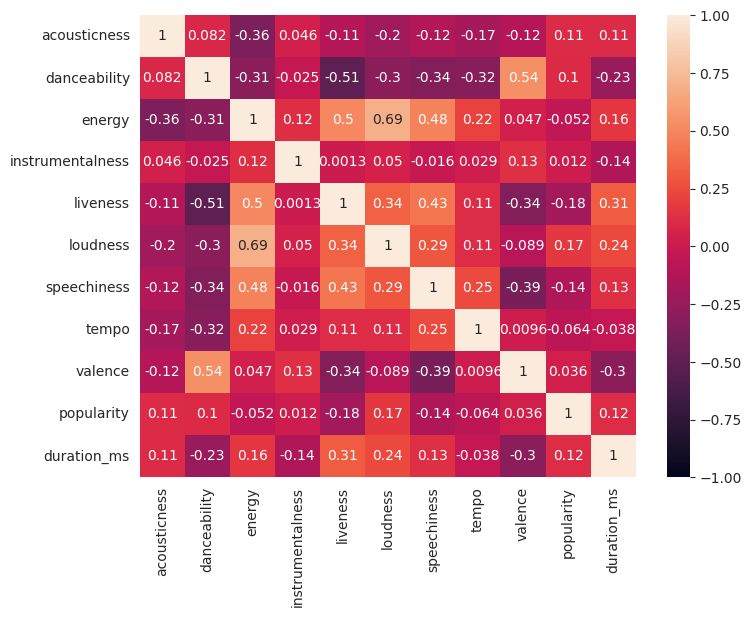

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(numeric_only=True),annot=True,vmin=-1)
plt.show()

## Step 3.1 Utilize suitable visualizations to identify the two albums that should berecommended to anyone based on the number of popular songs in each album

Top two albums based on total popularity:
 album
Exile On Main Street (2010 Re-Mastered)    30.475782
Exile On Main Street (Deluxe Version)      20.681836
Name: popularity, dtype: float64


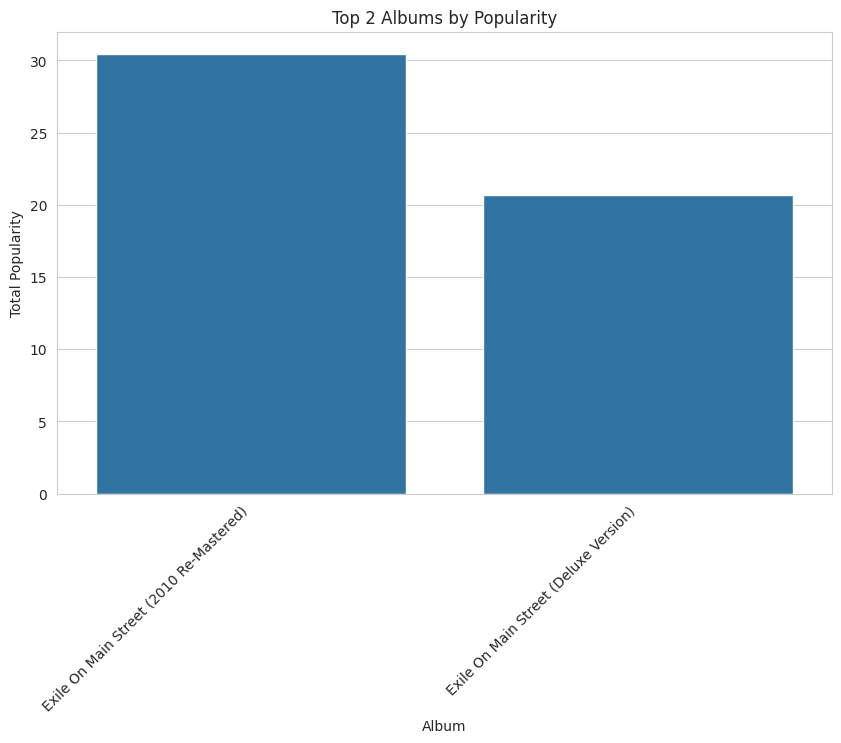

In [ ]:
# Continue EDA and Feature Engineering

# a. Albums with the most popular songs
album_popularity = df.groupby('album')['popularity'].sum().sort_values(ascending=False)
top_two_albums = album_popularity.head(2)
print("Top two albums based on total popularity:\n", top_two_albums)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_two_albums.index, y=top_two_albums.values)
plt.title('Top 2 Albums by Popularity')
plt.xlabel('Album')
plt.ylabel('Total Popularity')
plt.xticks(rotation=45, ha='right')
plt.show()

## Step 3.2 Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

<Figure size 1200x1000 with 0 Axes>

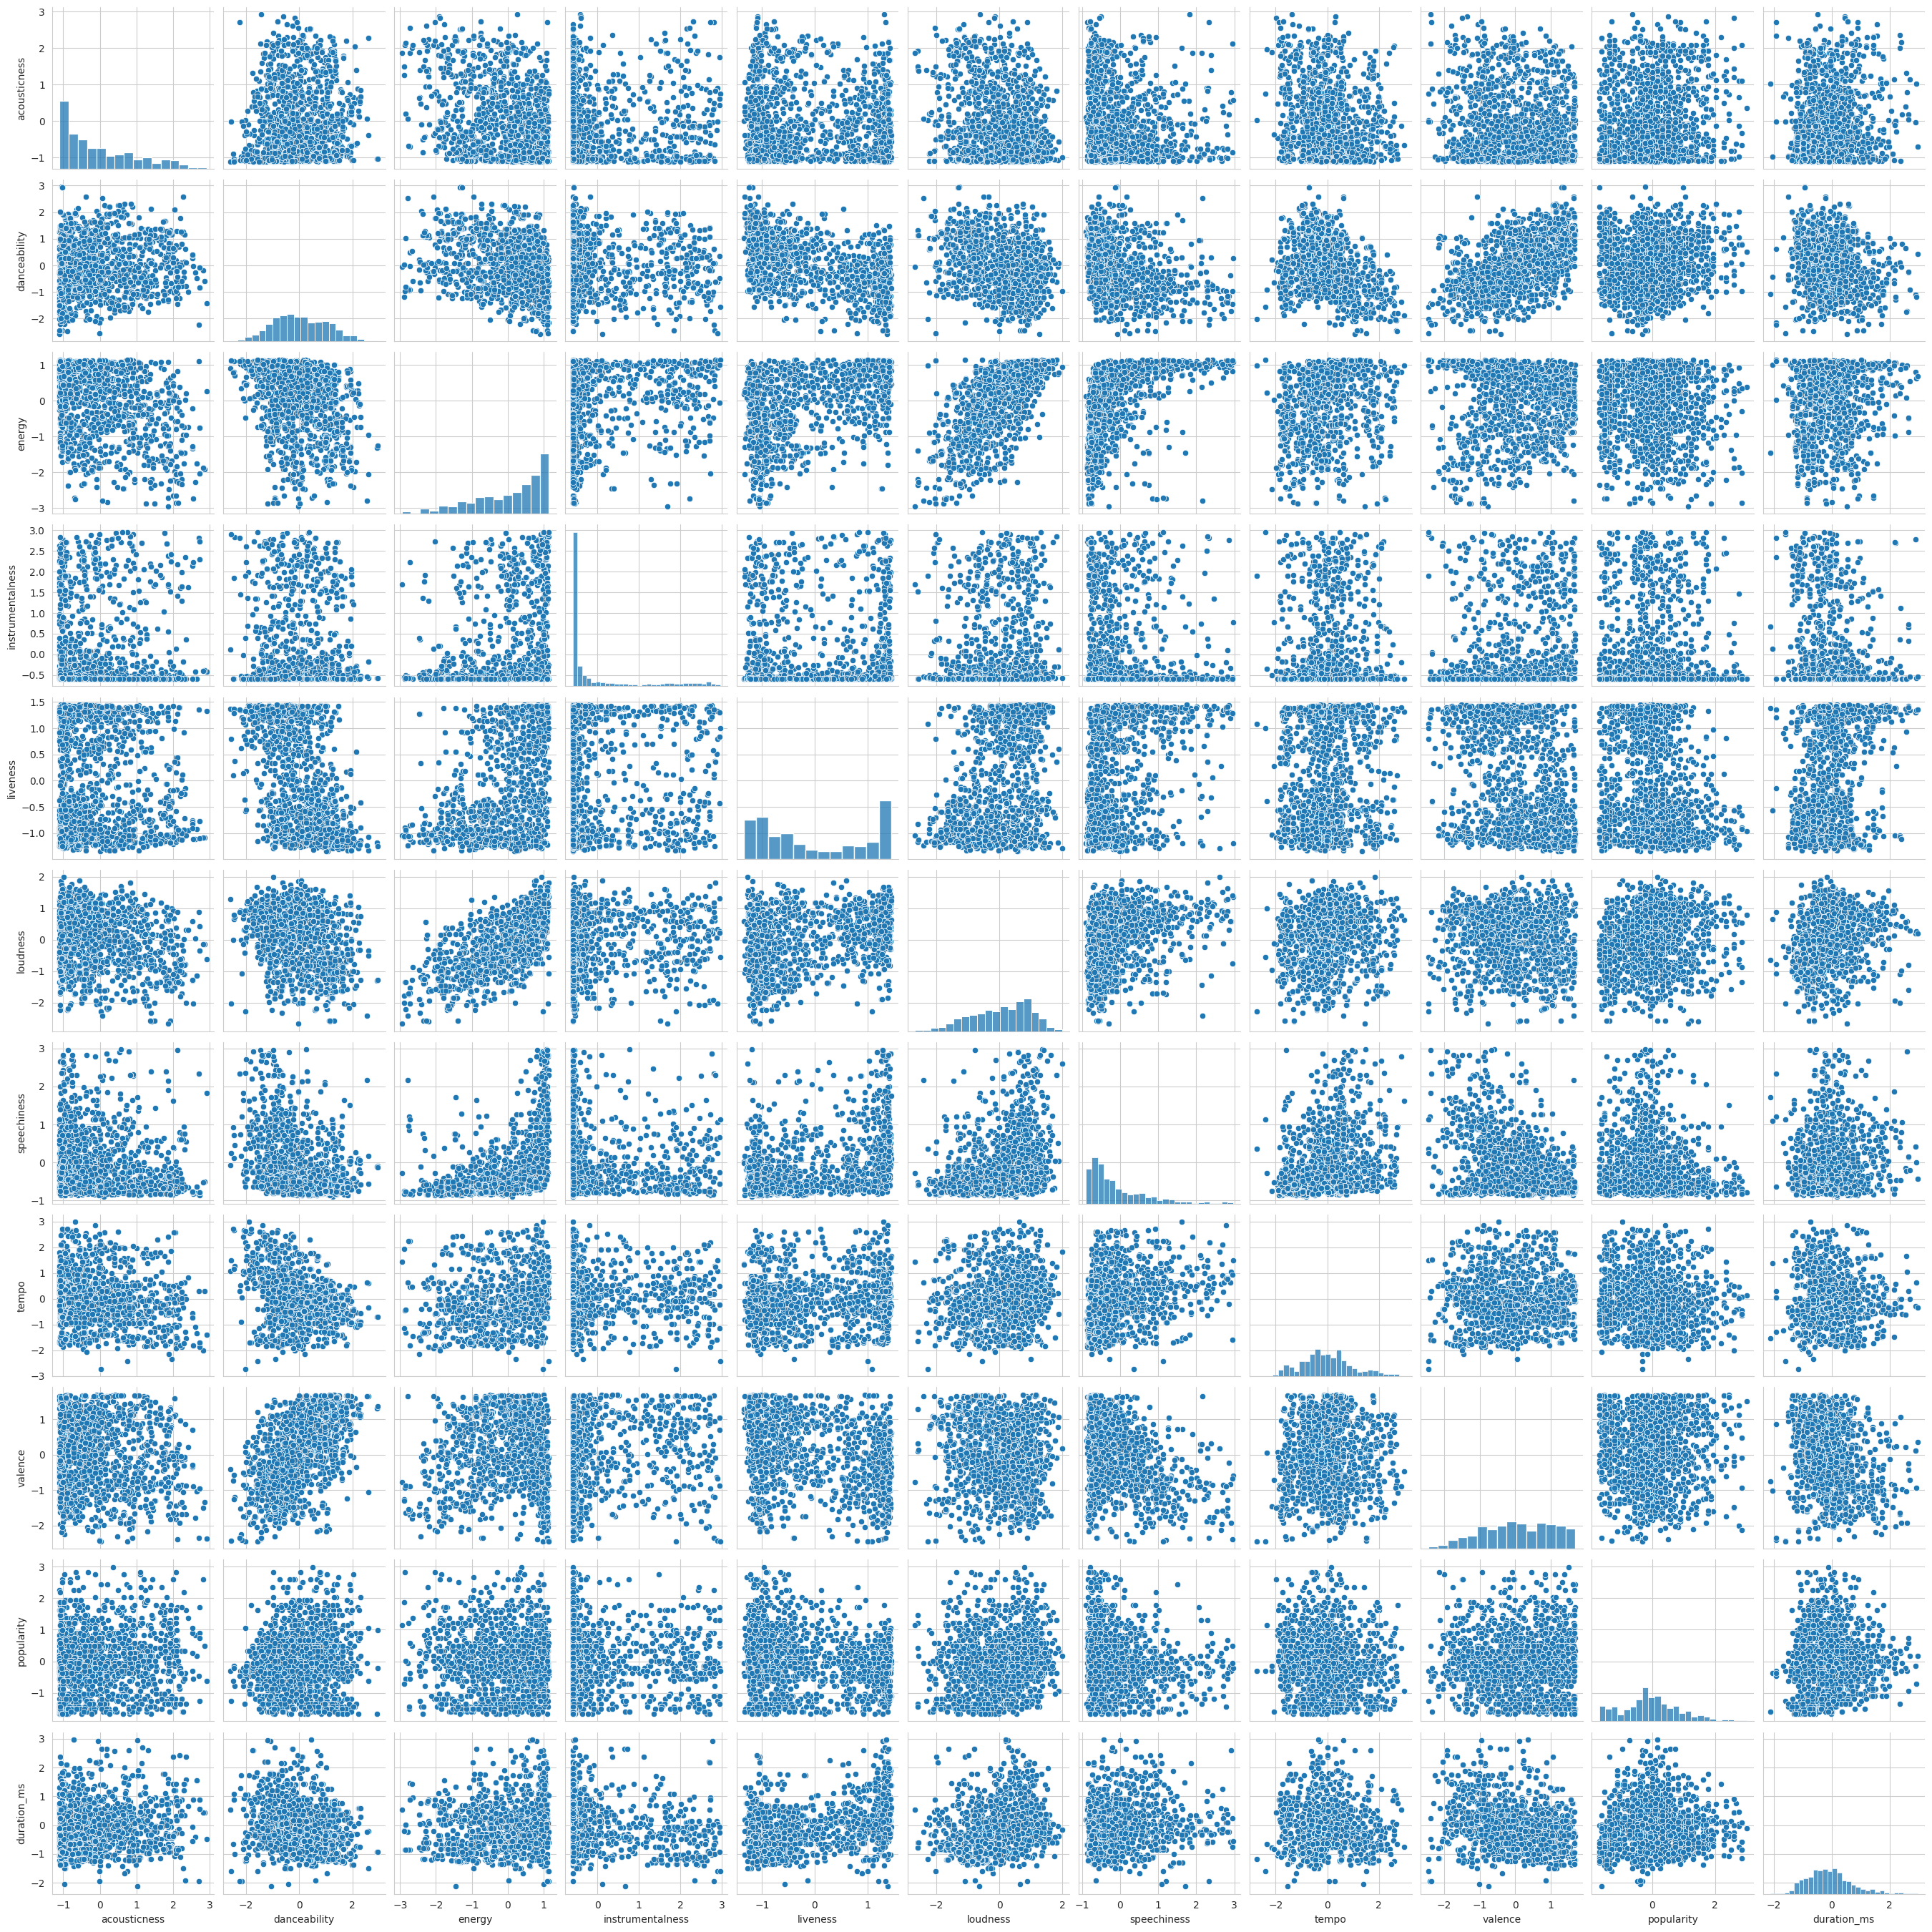

In [ ]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(12,10))
sns.pairplot(df[numerical_features])

## Step 3.3 Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

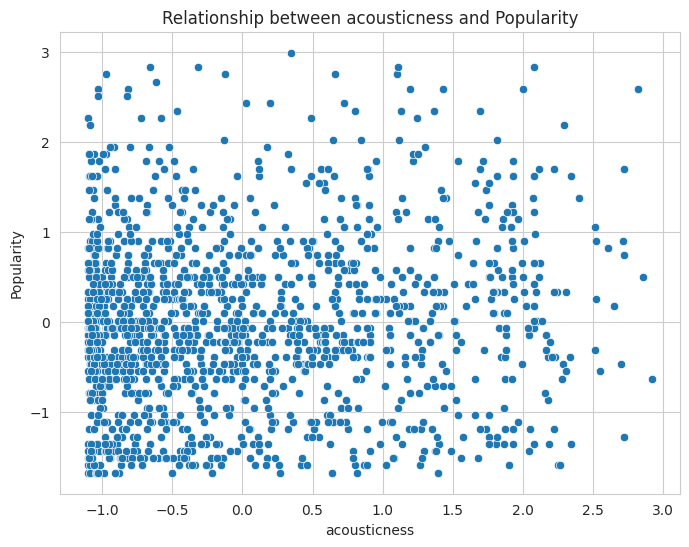

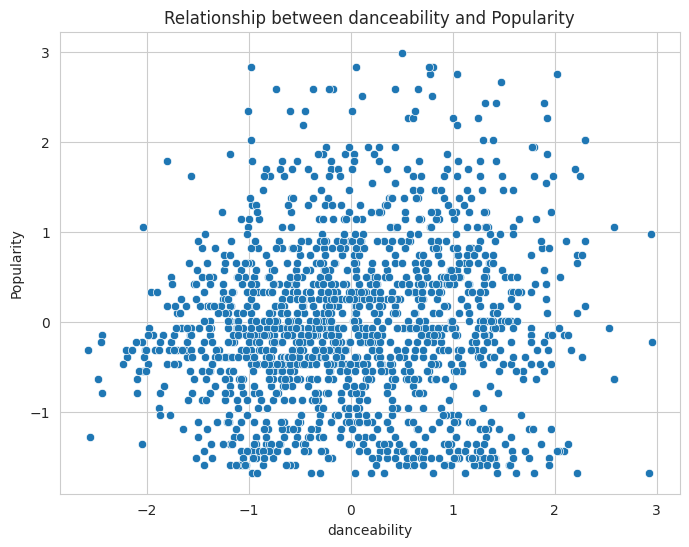

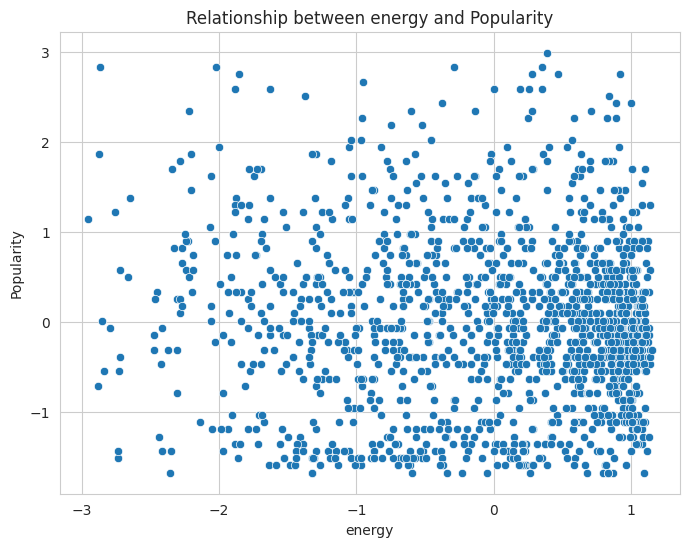

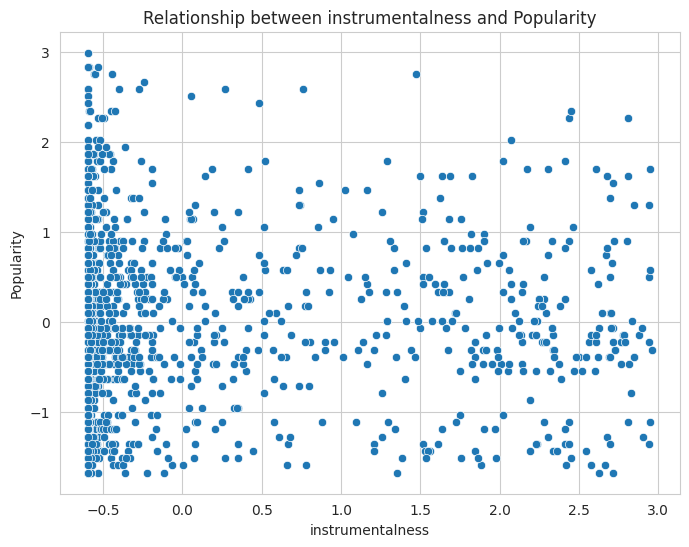

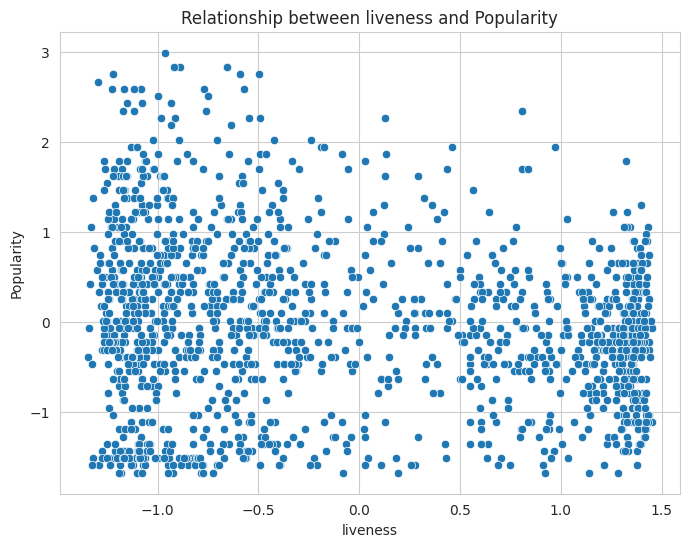

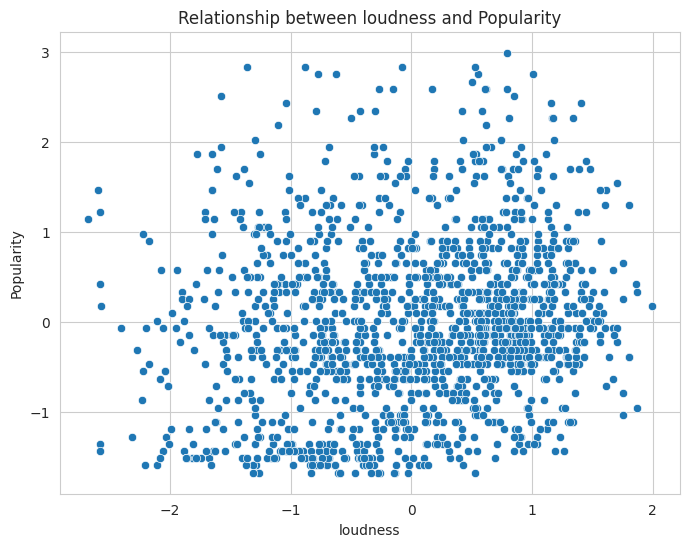

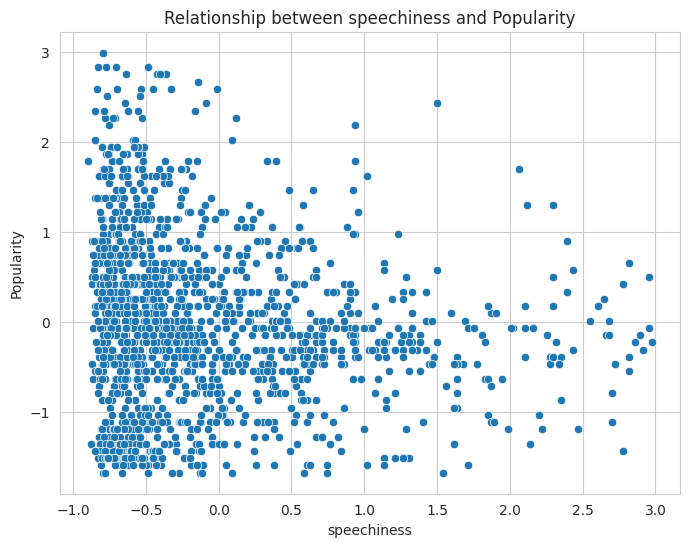

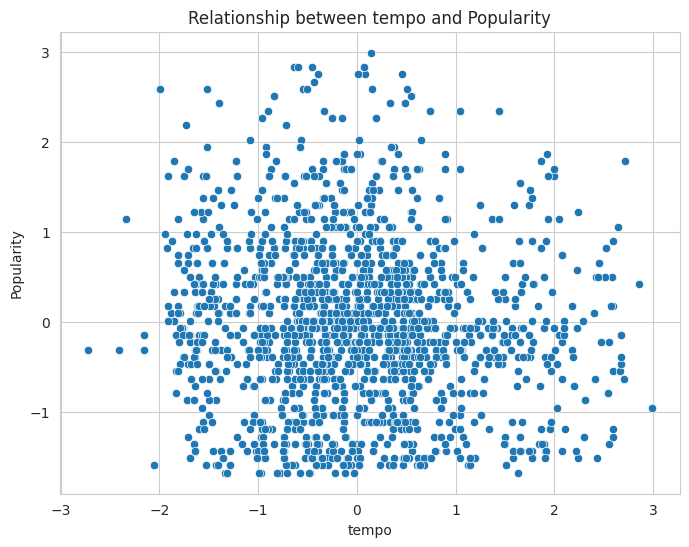

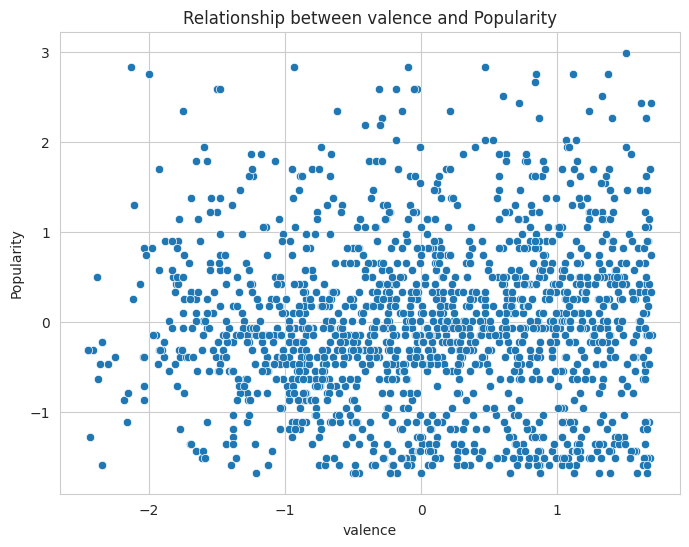

In [ ]:
# Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns
features_of_songs = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
# Analyze relationships between numerical features and popularity
for col in features_of_songs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['popularity'])
    plt.title(f'Relationship between {col} and Popularity')
    plt.xlabel(col)
    plt.ylabel('Popularity')
    plt.show()

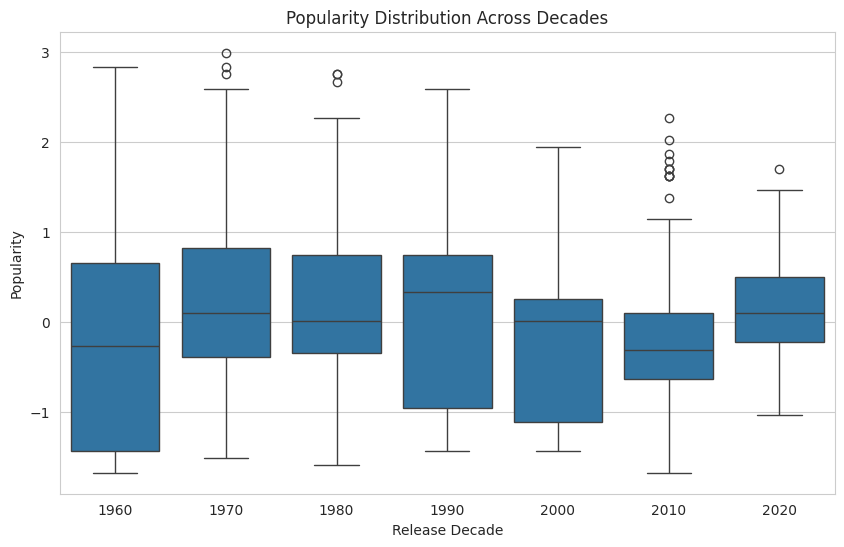

In [ ]:
# Explore the distribution of popularity across different decades
plt.figure(figsize=(10, 6))
sns.boxplot(x='release_decade', y='popularity', data=df)
plt.title('Popularity Distribution Across Decades')
plt.xlabel('Release Decade')
plt.ylabel('Popularity')
plt.show()

# Further explorations:
# - Analyze the distribution of audio features within specific decades or genres.
# - Investigate the relationship between tempo and energy.
# - Explore the evolution of audio features over time.
# - Create more visualizations to understand the data better.

## Step 3.3 Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

In [ ]:
#Draw a heatmap of the correlation matrix between all numerical features or columns in the data.
df[numerical_features].corr(numeric_only=True)

acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000      0.081612 -0.363625          0.046211   
danceability          0.081612      1.000000 -0.312081         -0.024561   
energy               -0.363625     -0.312081  1.000000          0.122720   
instrumentalness      0.046211     -0.024561  0.122720          1.000000   
liveness             -0.112355     -0.510922  0.503274          0.001311   
loudness             -0.200142     -0.297296  0.694790          0.050053   
speechiness          -0.119025     -0.342865  0.479397         -0.015671   
tempo                -0.173219     -0.318273  0.215697          0.029341   
valence              -0.115866      0.535234  0.046665          0.127868   
popularity            0.105469      0.099812 -0.051860          0.011834   
duration_ms           0.106276     -0.233560  0.156284         -0.138705   

                  liveness  loudness  speechiness     tempo   valence  \
acousticness     -0.112355 -0.200142    -0.119025 -0.173219 -0.115866   
danceability     -0.510922 -0.297296    -0.342865 -0.318273  0.535234   
energy            0.503274  0.694790     0.479397  0.215697  0.046665   
instrumentalness  0.001311  0.050053    -0.015671  0.029341  0.127868   
liveness          1.000000  0.340895     0.429659  0.113494 -0.341884   
loudness          0.340895  1.000000     0.292776  0.112611 -0.088728   
speechiness       0.429659  0.292776     1.000000  0.247941 -0.385720   
tempo             0.113494  0.112611     0.247941  1.000000  0.009591   
valence          -0.341884 -0.088728    -0.385720  0.009591  1.000000   
popularity       -0.180020  0.167845    -0.135269 -0.063744  0.035501   
duration_ms       0.313684  0.236534     0.132173 -0.038236 -0.302516   

                  popularity  duration_ms  
acousticness        0.105469     0.106276  
danceability        0.099812    -0.233560  
energy             -0.051860     0.156284  
instrumentalness    0.011834    -0.138705  
liveness           -0.180020     0.313684  
loudness            0.167845     0.236534  
speechiness        -0.135269     0.132173  
tempo              -0.063744    -0.038236  
valence             0.035501    -0.302516  
popularity          1.000000     0.116511  
duration_ms         0.116511     1.000000

<Axes: >

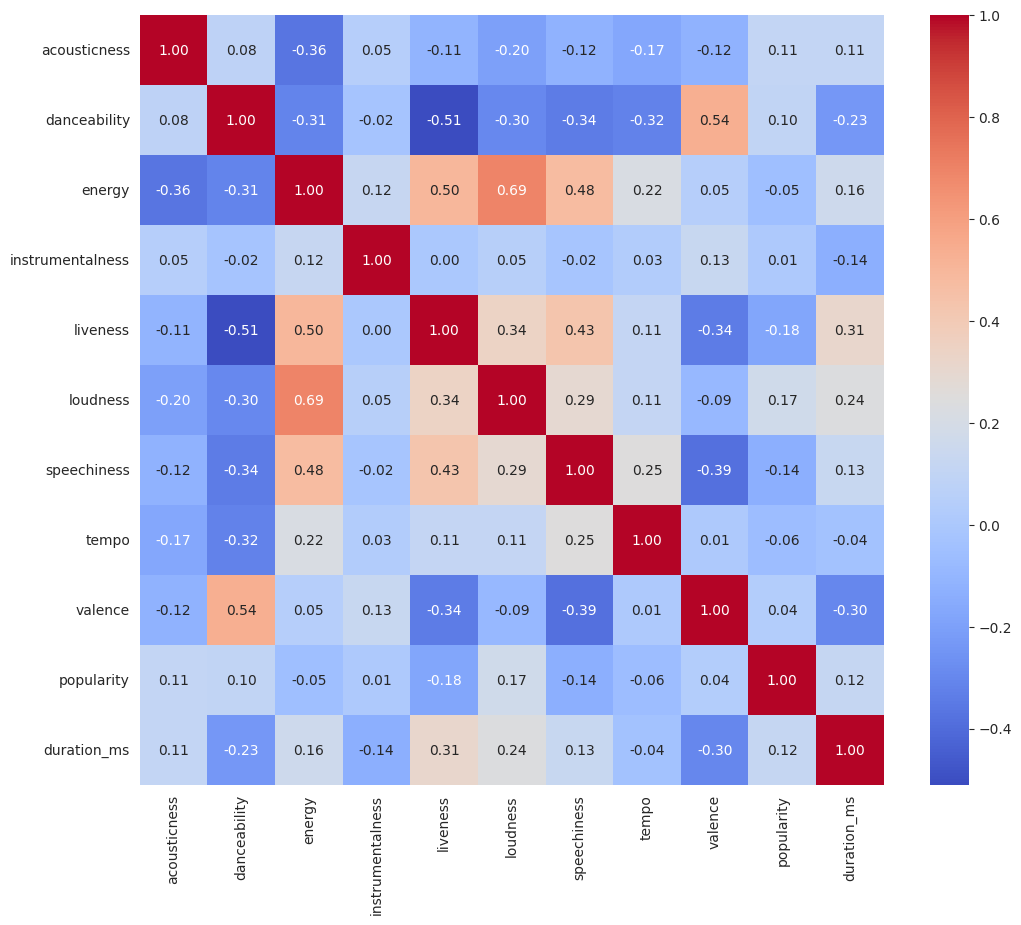

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_features].corr(numeric_only=True),annot=True,cmap='coolwarm', fmt='.2f')

## 3.4 Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations


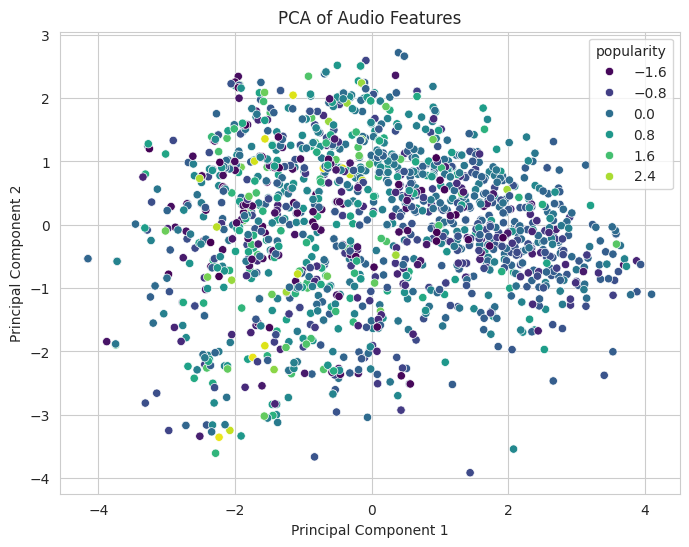

Explained Variance Ratio: [0.3288514  0.17674306]


In [ ]:
# d. Dimensionality Reduction Insights
# PCA or t-SNE could reduce the dimensionality of the audio features
# (acousticness, danceability, energy, etc.) while preserving most of the variance.
# This would help visualize the data in a lower-dimensional space, identify clusters,
# and potentially discover hidden relationships between songs.

from sklearn.decomposition import PCA

# Select audio features for dimensionality reduction
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X_Selected_Features = df[audio_features]

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_Selected_Features)

# Adding principal components to the dataframe
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Visualize the reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df, hue='popularity', palette='viridis')
# plt.colorbar(label='Popularity')
plt.title('PCA of Audio Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

### Observation


*  **Spread and Clustering:** The data points are widely spread across the two principal components (PC1 and PC2), but no distinct clusters are immediately visible. This suggests that while PCA captures variations in the dataset, the features may not separate into well-defined groups in this two-dimensional space.

*  **Color Gradient (Popularity Distribution)** The color of each point represents the "popularity" of the track, with darker shades indicating lower popularity and lighter shades indicating higher popularity. There is no clear linear trend between popularity and the principal components, suggesting that popularity is influenced by multiple factors beyond the selected audio features.

* **Moderate Overlap of Points:** Many data points overlap, indicating that some audio features may have similar contributions to both PC1 and PC2. This means PCA might not fully disentangle unique feature contributions and may require additional principal components to capture more variance.


### Moderate Explained Variance by PC1 and PC2:

* **Moderate Variance Representation:**
PCA typically orders components by the amount of variance they capture. If PC1 and PC2 do not explain a high percentage (e.g., below 60-70%), additional components may be needed for a more comprehensive representation.
If the cumulative explained variance of PC1 and PC2 is around 40-60%, it indicates that while they capture some patterns, other principal components are also essential.

* **Potential Need for More Dimensions:**
 If PC1 and PC2 together explain only a moderate portion of the variance, adding a third component (PC3) might improve separability.
The presence of significant data dispersion suggests that dimensionality reduction to just two components may lead to some information loss.


# 4 Perform cluster analysis

## Step 4.1 Identify the right number of clusters

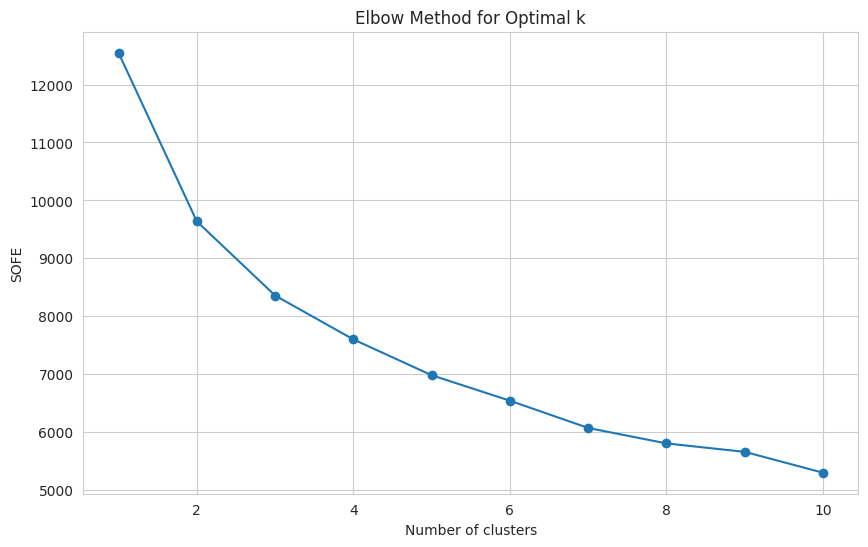

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters (e.g., using the elbow method)
sofe = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_Selected_Features)
    sofe.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sofe, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SOFE')
plt.show()

## Step 4.2 Use appropriate clustering algorithms

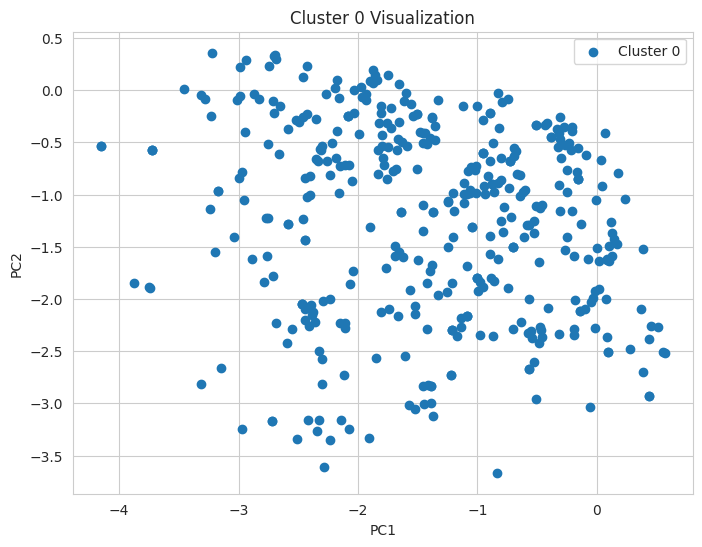

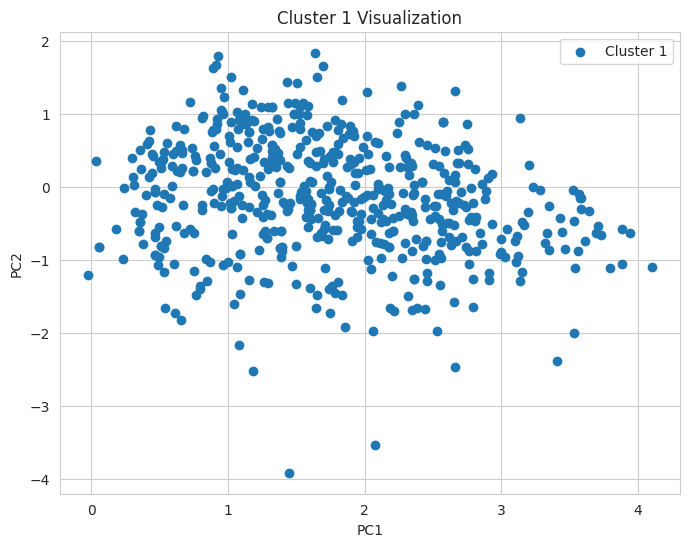

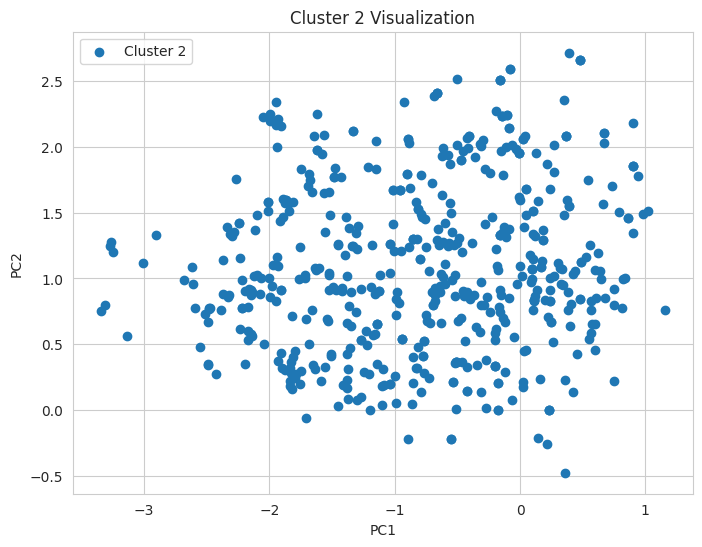

Silhouette Score: 0.1665152740950988


In [ ]:
# Based on the elbow method, the optimal number of clusters is 3
optimal_k = 3

# select only numerical features
df_numerical = df[numerical_features]

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(df_numerical)

# Analyze and visualize clusters
for i in range(optimal_k):
    cluster_data = df[df['cluster'] == i]
    # print(f"Cluster {i} characteristics:")
    # print(cluster_data.describe())
    # Visualize cluster data
    plt.figure(figsize=(8, 6))
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f"Cluster {i}")
    plt.title(f"Cluster {i} Visualization")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()
# Evaluate cluster quality (e.g. silhouette score)
silhouette_avg = silhouette_score(df_numerical, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


In [ ]:
# Aggregate by cluster and calculate the mean of numeric features
cluster_summary = df.groupby('cluster')[numerical_features].mean()

# Get the most common album for each cluster
most_common_album = df.groupby('cluster')['album'].agg(lambda x: x.mode()[0])

# Combine numeric summary with the most common album
cluster_summary['most_common_album'] = most_common_album

# Display combined cluster summary
cluster_summary

acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.746127      0.188157 -1.161470         -0.348392 -0.561592   
1           -0.332819     -0.716667  0.732931         -0.039503  0.935651   
2           -0.268535      0.685464  0.137722          0.302772 -0.610153   

         loudness  speechiness     tempo   valence  popularity  duration_ms  \
cluster                                                                       
0       -0.741524    -0.460770 -0.468870 -0.392539    0.046684    -0.156626   
1        0.547684     0.493877  0.369562 -0.480701   -0.245734     0.197776   
2        0.085540    -0.405483 -0.079891  0.922069    0.152653    -0.327842   

                  most_common_album  
cluster                              
0            Aftermath (Uk Version)  
1        Voodoo Lounge Uncut (Live)  
2                     Honk (Deluxe)

### Cluster Analysis

There three distinct clusters based on various musical attributes such as acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, and duration. Below is a breakdown of each cluster and its characteristics.


#### Cluster 0: Acoustic & Low Energy Tracks

  *  Acousticness: High (0.746)
  *  Danceability: Low (0.188)
  *  Energy: Low (-1.614)
  *  Instrumentalness: Moderately negative (-0.348)
  *  Liveness: Low (-0.561)
  *  Loudness: Low (-0.741)
  *  Speechiness: Low (-0.460)
  *  Tempo: Slow (-0.468)
  *  Valence: Moderately low (-0.392)
  *  Popularity: Neutral (0.046)
  *  Duration: Neutral (-0.156)
  *  Most Common Album: Aftermath (UK Version)


**Interpretation:**
This cluster consists of songs that are more acoustic, slow-paced, and low-energy, making them suitable for a relaxed listening experience. They are not very danceable or loud, and they contain a moderate amount of instrumental elements. These songs are likely to be mellow, calm, or classic acoustic tracks.
Cluster 1: High Energy & Live Performance Tracks


---


#### Cluster 1: High Energy & Live Performance Tracks

* Acousticness: Low (-0.332)
* Danceability: Very Low (-0.716)
* Energy: High (0.732)
* Instrumentalness: Low (-0.039)
* Liveness: Very High (0.935)
* Loudness: High (0.547)
* Speechiness: High (0.493)
* Tempo: Fast (0.369)
* Valence: Low (-0.480)
* Popularity: Negative (-0.245)
* Duration: Positive (0.197)
* Most Common Album: Voodoo Lounge Uncut (Live)


**Interpretation:**

Songs in this cluster tend to be high-energy, loud, and often performed live. The high liveness score suggests that these songs may come from concert recordings or energetic rock performances. Despite being high-energy, they are not particularly danceable. The negative valence score suggests that these songs might have a dark, moody, or intense feel rather than an uplifting one.



---

#### Cluster 2: Danceable & Feel-Good Tracks

*  Acousticness: Low (-0.268)
*  Danceability: High (0.685)
*  Energy: Moderate (0.377)
*  Instrumentalness: High (0.302)
*  Liveness: Low (-0.610)
*  Loudness: Neutral (0.085)
*  Speechiness: Low (-0.405)
*  Tempo: Moderate (-0.079)
*  Valence: Very High (0.922)
*  Popularity: Positive (0.152)
*  Duration: Negative (-0.327)
*  Most Common Album: Honk (Deluxe)


**Interpretation:**

This cluster represents danceable and feel-good tracks. The high danceability and high valence suggest that these songs are upbeat, positive, and great for dancing or enjoying in a lively setting. The moderate energy level and slightly lower instrumentalness indicate that these are likely well-produced pop or rock songs. The popularity score is positive, meaning they might be more well-known or mainstream tracks.





#### Overall Summary

* Cluster 0 (Acoustic & Low Energy): Calm, soft, and acoustic songs, often slow and less danceable.
* Cluster 1 (High Energy & Live Performance): Loud, intense, and energetic rock or live concert tracks with high liveness.
* Cluster 2 (Danceable & Feel-Good): Positive, high-valence songs with strong danceability, great for lively settings.

These clusters effectively segment songs into relaxed/acoustic, intense/live, and danceable/upbeat categories, helping to understand the mood and characteristics of different musical selections.